<a href="https://colab.research.google.com/github/Harshavignyan/ML_Content/blob/main/PCA_Harshal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
# importind libraries
import numpy as np
import pandas as pd

In [212]:
#MNIST hand written digits dataset
from sklearn import datasets
from sklearn.datasets import load_digits

In [213]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [214]:
# import visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

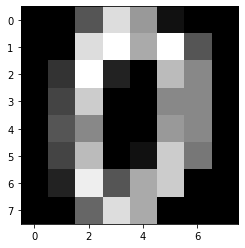

In [215]:
# to check the visualization of 0th index image
plt.imshow(digits.images[0], cmap=plt.cm.gray)

In [216]:
data1 = pd.DataFrame(digits.data)

In [217]:
# observing data
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [218]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [219]:
# shape of whole data set
digits.data.shape

(1797, 64)

In [220]:
# shape of each image in the dataset
digits.images.shape

(1797, 8, 8)

In [221]:
# to explain the elarner wt is the pixel value of each image and wt is target value
# and how to get mupltiple outputs using enumrated
# to view the pixel values of first 5 images
digits.data[0:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [222]:
# what are target values
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [223]:
# what is enumerate
for i,j in enumerate(['el1','el2','el3']):
  print(i)
  print(j)

0
el1
1
el2
2
el3


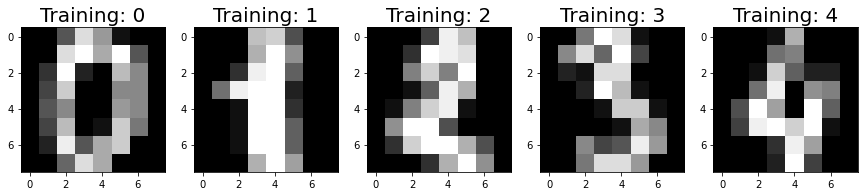

In [224]:
# Displaying some of the images and labels
plt.figure(figsize=(15,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1,5, index+1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title(f"Training: {label}", fontsize=20)

In [225]:
# splitting values of x and y
x = digits.data
y = digits.target

In [226]:
x.shape

(1797, 64)

In [227]:
y.shape

(1797,)

In [228]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [229]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [230]:
# we will perform standardization on our dataset
# so that, mean will be 0 and variance will be 1
# Standardization is useful when your data has varying scales and
# the algorithm you are using does make assumptions about your data having 
# a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

In [231]:
# data normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

In [232]:
X_std.shape

(1797, 64)

In [233]:
X_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [234]:
# we take tahe transpose of this matrix
x1 = X_std.T
x1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

In [235]:
# after finding the standardization
# we find the covariance matrix
# It is a symmetric matrix that shows covariances of each pair of variables.
# These values in the covariance matrix show the distribution magnitude and direction
# of multivariate data in multidimensional space. 
# By controlling these values we can have information about how data spread among two dimensions.

In [236]:
cov_mat = np.cov(X_std.T)
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [237]:
# eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [238]:
eig_vals

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.27692285, 0.05037444,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [239]:
eig_vecs

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [240]:
# we will find explained variance
# r2 = R2 = η
# Explained variance can be denoted with r2. 
# In ANOVA, it's called eta squared (η2) and in regression analysis, it's called 
# the Coefficient of Determination (R2).
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
var_exp

[12.033916097734892,
 9.561054403097872,
 8.44441489262455,
 6.498407907524166,
 4.860154875966405,
 4.214119869271941,
 3.9420828035673914,
 3.389380924638329,
 2.9982210116252284,
 2.932002551252217,
 2.781805463550336,
 2.5770550925819915,
 2.2753033157642415,
 2.227179739514352,
 2.165229431849246,
 1.9141666064421354,
 1.7755470851681932,
 1.638069274284425,
 1.5964601688623532,
 1.4891911870878218,
 1.3479695658179345,
 1.2719313702347557,
 1.1658373505919533,
 1.0576465985363201,
 0.9753159471981104,
 0.9445589897319973,
 0.8630138269707223,
 0.8366428536685113,
 0.7976932484112407,
 0.7464713709260609,
 0.7255821513702755,
 0.6919112454811812,
 0.6539085355726171,
 0.6407925738459863,
 0.5913841117223418,
 0.5711624052235242,
 0.5236368034166353,
 0.48180758644514354,
 0.4537192598584495,
 0.42316275323277974,
 0.4060530699790385,
 0.3970848082758281,
 0.3564933031426166,
 0.34078718147029996,
 0.3278353352879543,
 0.3110320073453573,
 0.28857529410893396,
 0.2764892635235467,


In [241]:
# next we will find the cumulative explained variance
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

In [242]:
# plot a graph between individual explained variance and cumulative explained variance
# to check the percentage of diff pc's like pc1, pc2 etc...
# from the graph, neglect the pc's which don't impact our model
# and select impactful components

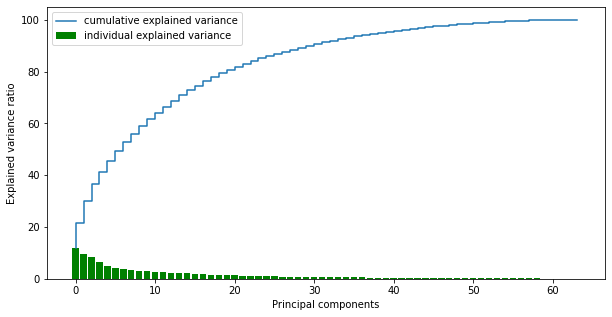

In [243]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [244]:
# divide the dataset into train and test for pca and also for DT 
# which we perform later on after dimensionality reduction

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y, train_size=0.8)

In [247]:
x_train.shape

(1437, 64)

In [248]:
x_test.shape

(360, 64)

In [249]:
from sklearn.decomposition import PCA 

In [250]:
# apply pca on these train and test data
pca = PCA(n_components=40) # inplace of 40, can also take 0.95
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [251]:
pca_x_train.shape

(1437, 40)

In [252]:
# after applying pca we will perform DT
from sklearn.tree import DecisionTreeClassifier

In [199]:
rf=DecisionTreeClassifier().fit(pca_x_train,y_train)

In [200]:
# why did we do transform for pca_x_test?
# cuz x_test has 64 features but dtclassifier takes only 40 features
predicted=rf.predict(pca_x_test)
predicted

array([4, 6, 7, 7, 7, 3, 6, 8, 0, 6, 1, 6, 9, 6, 8, 6, 0, 3, 8, 5, 8, 5,
       3, 3, 5, 8, 6, 5, 1, 5, 3, 8, 4, 3, 0, 8, 1, 2, 9, 2, 4, 3, 4, 0,
       9, 7, 9, 3, 8, 9, 9, 2, 0, 0, 9, 8, 1, 0, 8, 2, 2, 9, 0, 9, 3, 2,
       9, 4, 1, 8, 8, 4, 0, 8, 9, 1, 5, 4, 5, 1, 1, 1, 0, 9, 2, 3, 8, 3,
       9, 6, 3, 4, 4, 0, 7, 8, 0, 7, 5, 8, 2, 9, 8, 7, 1, 5, 7, 5, 6, 3,
       2, 9, 7, 1, 5, 3, 8, 8, 0, 2, 0, 5, 5, 7, 1, 5, 4, 0, 8, 9, 4, 1,
       4, 7, 2, 8, 3, 7, 4, 7, 9, 2, 0, 6, 7, 9, 0, 4, 8, 7, 1, 5, 1, 4,
       6, 7, 4, 4, 1, 4, 5, 4, 3, 5, 9, 6, 4, 8, 0, 4, 0, 5, 5, 7, 8, 9,
       2, 3, 9, 8, 4, 5, 7, 5, 2, 9, 6, 6, 3, 8, 9, 0, 1, 1, 6, 7, 6, 1,
       5, 6, 4, 1, 0, 3, 3, 3, 2, 5, 0, 4, 9, 3, 0, 0, 3, 0, 8, 0, 9, 5,
       4, 2, 0, 7, 6, 5, 5, 2, 3, 5, 6, 0, 7, 5, 6, 2, 3, 3, 9, 7, 4, 8,
       9, 0, 6, 2, 0, 6, 3, 3, 0, 8, 9, 2, 4, 8, 8, 7, 0, 1, 6, 9, 6, 1,
       9, 4, 0, 5, 6, 7, 4, 7, 7, 7, 3, 1, 0, 5, 9, 2, 3, 9, 3, 3, 7, 5,
       3, 8, 7, 8, 0, 8, 8, 8, 4, 8, 3, 4, 6, 4, 4,

In [201]:
y_test

array([4, 6, 7, 7, 7, 3, 6, 8, 0, 6, 1, 2, 9, 6, 3, 4, 0, 3, 7, 5, 8, 5,
       2, 9, 5, 4, 6, 5, 1, 5, 3, 8, 4, 3, 0, 8, 1, 2, 9, 2, 4, 3, 4, 0,
       8, 2, 9, 3, 8, 9, 9, 2, 0, 0, 9, 8, 1, 0, 8, 1, 1, 9, 0, 9, 3, 4,
       0, 6, 1, 4, 4, 4, 0, 8, 9, 1, 5, 4, 8, 1, 1, 1, 0, 9, 2, 3, 5, 3,
       8, 6, 3, 4, 4, 0, 7, 8, 0, 7, 5, 8, 2, 6, 8, 7, 1, 5, 7, 5, 6, 3,
       3, 4, 7, 1, 5, 3, 5, 3, 0, 2, 0, 5, 5, 7, 5, 5, 4, 0, 8, 9, 4, 1,
       8, 4, 2, 8, 3, 7, 4, 7, 5, 2, 5, 6, 2, 9, 0, 4, 9, 7, 1, 5, 1, 4,
       6, 7, 4, 4, 1, 8, 5, 4, 3, 5, 8, 8, 4, 5, 0, 4, 0, 5, 5, 7, 8, 9,
       2, 3, 9, 8, 4, 5, 7, 0, 1, 3, 6, 8, 3, 9, 9, 0, 1, 1, 6, 7, 6, 1,
       5, 6, 4, 1, 0, 5, 3, 3, 2, 2, 5, 4, 9, 3, 0, 0, 3, 0, 8, 0, 8, 8,
       1, 2, 9, 7, 6, 5, 5, 2, 3, 2, 6, 0, 7, 5, 6, 2, 3, 3, 5, 7, 4, 8,
       9, 0, 4, 4, 0, 6, 3, 3, 0, 8, 1, 2, 4, 8, 1, 7, 0, 1, 6, 9, 1, 1,
       9, 4, 0, 5, 6, 9, 4, 3, 3, 7, 3, 1, 0, 5, 9, 2, 8, 9, 3, 3, 7, 5,
       3, 8, 7, 8, 0, 8, 8, 8, 4, 8, 9, 4, 6, 4, 4,

In [202]:
# check the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

In [203]:
confusion_matrix(predicted,y_test)

array([[36,  0,  0,  0,  1,  2,  0,  0,  0,  1],
       [ 0, 25,  0,  0,  0,  1,  0,  0,  1,  1],
       [ 0,  3, 17,  1,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 37,  0,  1,  0,  0,  1,  2],
       [ 0,  1,  0,  0, 34,  0,  1,  0,  2,  0],
       [ 1,  0,  2,  1,  0, 32,  0,  0,  2,  0],
       [ 0,  1,  1,  0,  2,  0, 28,  0,  2,  0],
       [ 0,  0,  2,  2,  1,  0,  0, 31,  0,  1],
       [ 0,  1,  0,  2,  5,  4,  0,  1, 28,  2],
       [ 1,  1,  0,  1,  1,  3,  1,  0,  4, 25]])

In [204]:
accuracy_score(predicted,y_test)

0.8138888888888889

In [205]:
# to check what values are miss classified in the pixel
def get_misclassified_index(y_pred,y_test):
    misclassification=[]#help us out to get the misclassified index value
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
            
    return misclassification

In [210]:
misclassification = get_misclassified_index(predicted,y_test)
misclassification

[11,
 14,
 15,
 18,
 22,
 23,
 25,
 44,
 45,
 59,
 60,
 65,
 66,
 67,
 69,
 70,
 78,
 86,
 88,
 101,
 110,
 111,
 116,
 117,
 124,
 132,
 133,
 140,
 142,
 144,
 148,
 159,
 164,
 165,
 167,
 183,
 184,
 185,
 187,
 189,
 203,
 207,
 208,
 218,
 219,
 220,
 222,
 229,
 238,
 244,
 245,
 252,
 256,
 262,
 269,
 271,
 272,
 280,
 296,
 314,
 318,
 320,
 326,
 327,
 337,
 343,
 359]

In [207]:
def plot_misclassifications(misclassification):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(pca_x_test[wrong],(5,8)),cmap=plt.cm.gray)
        plt.title("Predicted:{} Actual:{}".format(predicted[wrong],y_test[wrong]))

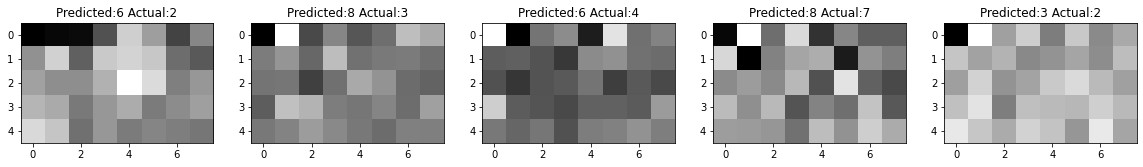

In [208]:
plot_misclassifications(misclassification)

In [262]:
# we will use xgboost for better accuracy

In [256]:
from xgboost import XGBClassifier

In [257]:
model = XGBClassifier()
model.fit(pca_x_train, y_train)

XGBClassifier(objective='multi:softprob')

In [258]:
y_pred = model.predict(pca_x_test)
predictions = [round(value) for value in y_pred]

In [259]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.44%


In [264]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [267]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, pca_x_test, y_test, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 85.83% (5.04%)
